# Finding summary statistic to identify antigens
The goal of this notebook is to compare various summary statistics that use immune history to identify antigenic loci.

In [2]:
import pfTent as tent
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
y=5 # Simulate for 5 years
a = [10,10,10,10] # control,antigenic loci 1, antigenic loci 2, antigenic loci 3
w = [0,0.333333,0.3333333,0.333333] # general immunity, control, antigenic loci 1, antigenic loci 2, antigenic loci 3
n_people = 100
fever, breaks = tent.load_data()
delta = 1/250

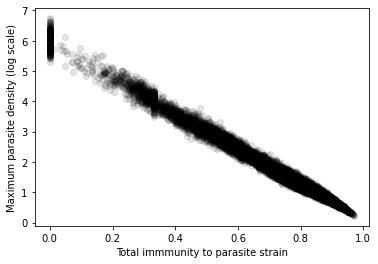

In [11]:
fig, ax = plt.subplots()
ax.plot(all_cross_imm, all_max_density, 'ko',alpha=0.1)
ax.set_xlabel('Total immmunity to parasite strain')
ax.set_ylabel('Maximum parasite density (log scale)')
fig.savefig("immunity_parasite-density.pdf")

So this is the best we could ever do, but the truth is we don't know which antigens all contribute to immunity. So let's plot immunity to a specific antigen vs. maximum parasite density.

In [23]:
all_test_imm_noz = all_test_imm.copy()
all_max_density_noz1 = all_max_density.copy()
all_control_imm_noz = all_control_imm.copy()
all_max_density_noz2 = all_max_density.copy()

to_remove_control = []
for i, imm in enumerate(all_control_imm):
    if imm == 0:
        to_remove_control.append(i)

to_remove_test = []
for i, imm in enumerate(all_test_imm):
    if imm == 0:
        to_remove_test.append(i)

for ele in sorted(to_remove_control, reverse = True):
    del all_control_imm_noz[ele]
    del all_max_density_noz1[ele]
    
for ele in sorted(to_remove_test, reverse = True):
    del all_test_imm_noz[ele]
    del all_max_density_noz2[ele]

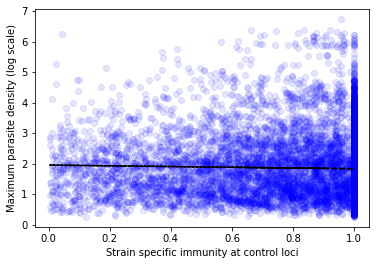

In [37]:
coef_control = np.polyfit(all_control_imm_noz,all_max_density_noz1,1)
poly1d_fn_control = np.poly1d(coef_control) 

fig,ax = plt.subplots()
ax.plot(all_control_imm_noz, all_max_density_noz1, 'bo', alpha=0.1)
#ax.plot(all_test_imm,all_max_density, 'go', alpha=0.1)
ax.plot(all_control_imm_noz, poly1d_fn_control(all_control_imm_noz), 'k', linestyle="dashed")
ax.set_xlabel('Strain specific immunity at control loci')
ax.set_ylabel('Maximum parasite density (log scale)')
fig.savefig("control-imm_parasite-density.pdf")

In [31]:
slope, intercept, r, p, se = st.linregress(all_control_imm_noz, all_max_density_noz1)
r**2

0.0008907494119063994

In [32]:
slope, intercept, r, p, se = st.linregress(all_test_imm_noz, all_max_density_noz2)
r**2

0.09292346238745708

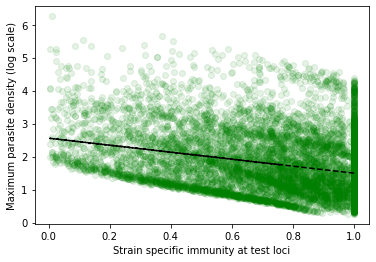

In [39]:
coef_test = np.polyfit(all_test_imm_noz,all_max_density_noz2,1)
poly1d_fn_test = np.poly1d(coef_test) 

fig,ax = plt.subplots()
#ax.plot(all_control_imm, all_max_density, 'bo', alpha=0.1)
ax.plot(all_test_imm_noz,all_max_density_noz2, 'go', alpha=0.1)
ax.plot(all_test_imm_noz, poly1d_fn_test(all_test_imm_noz), '--k')
ax.set_xlabel('Strain specific immunity at test loci')
ax.set_ylabel('Maximum parasite density (log scale)')
fig.savefig("test-imm_parasite-density.pdf")

## What is the parasite density difference between first & second infections?
Bryan & Isabel want me to look at this probably to get an idea if there's any real signal. Rather than looking at just the peaks, I think I'll grab all measured values.


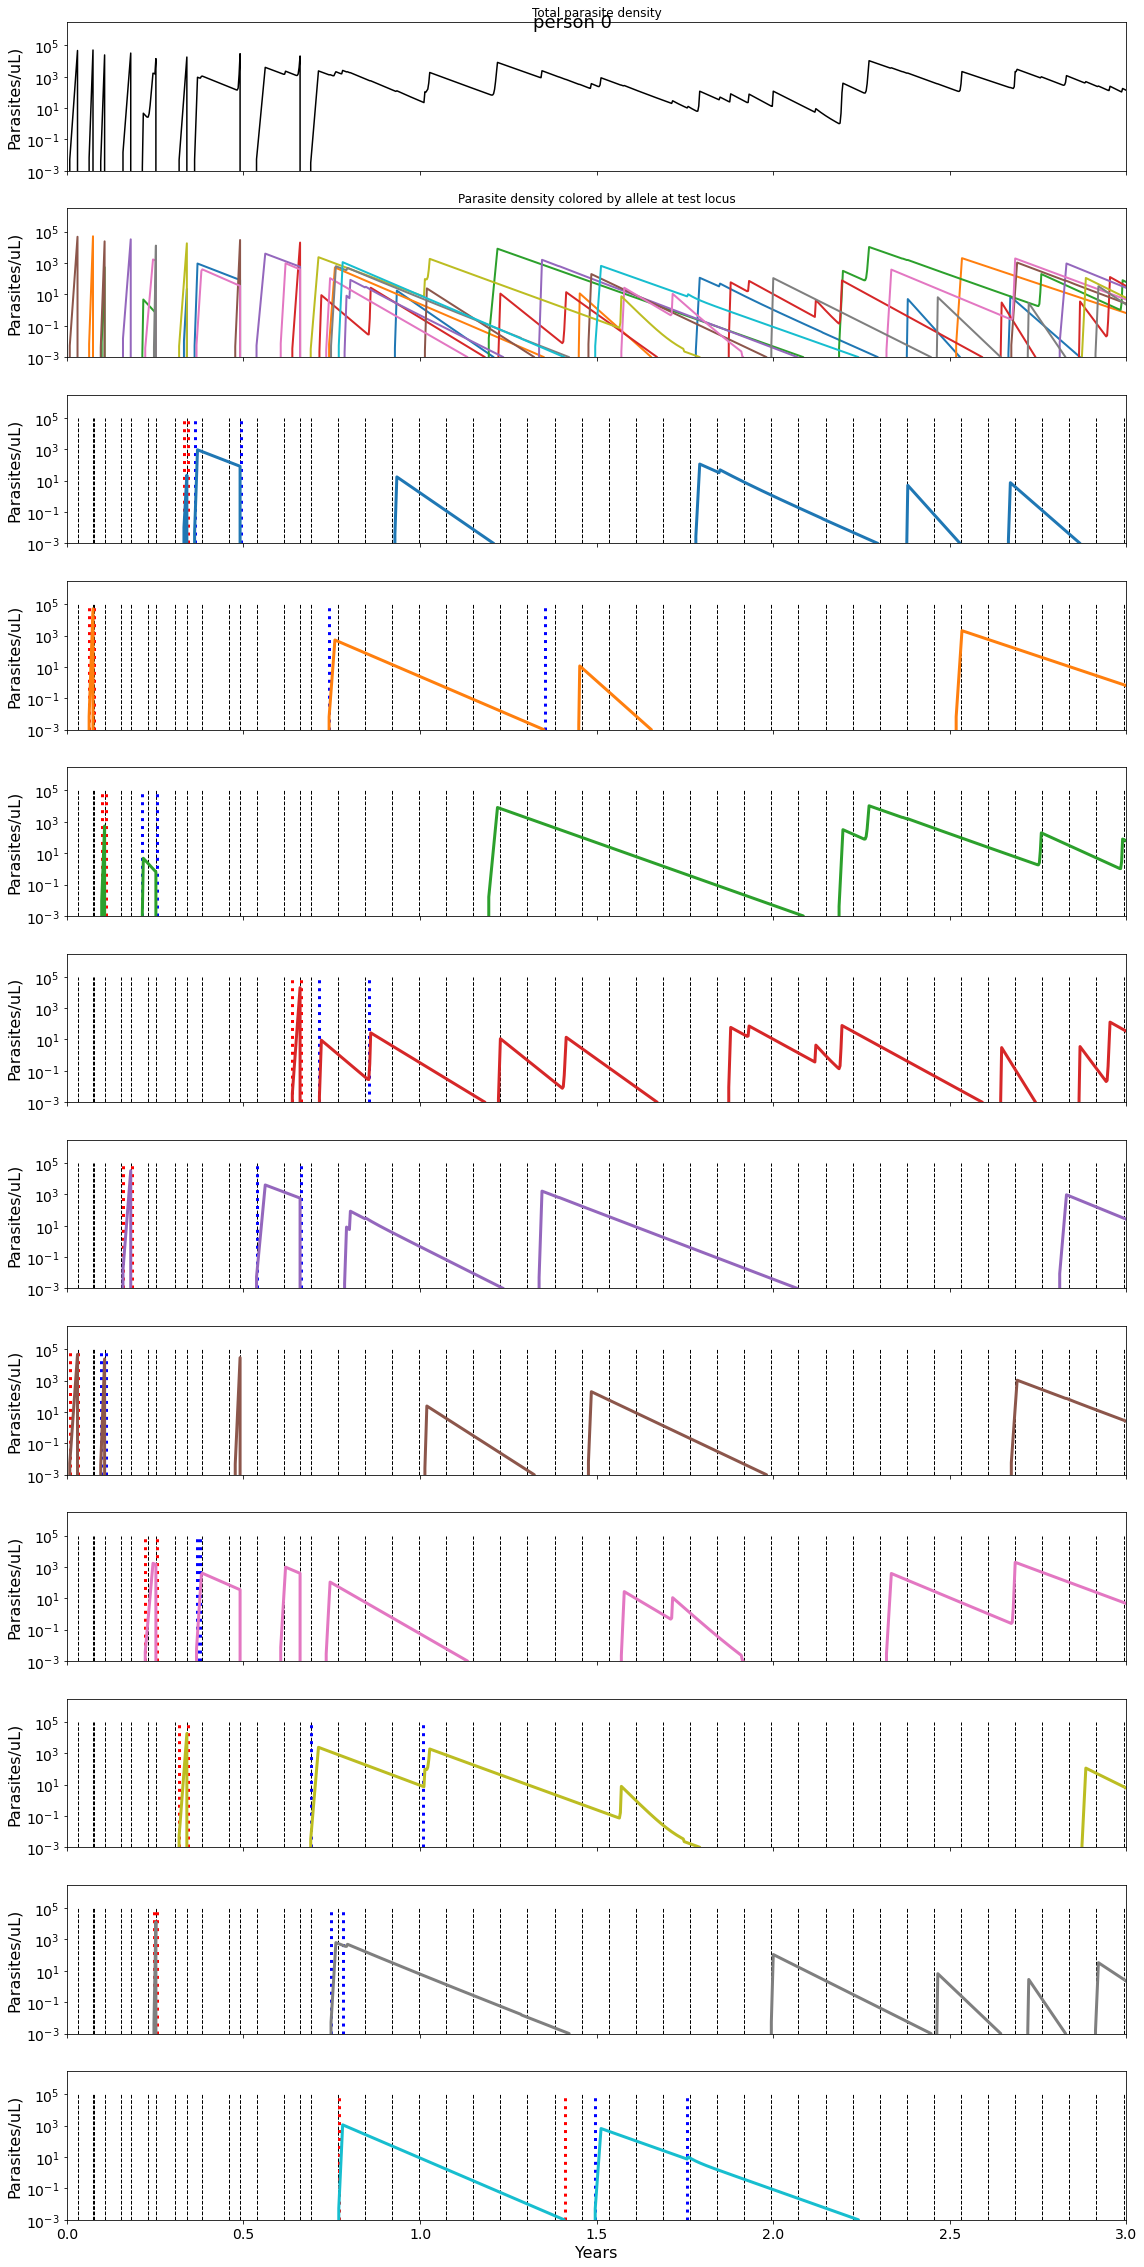

In [14]:
colors = {0:"tab:blue", 1:"tab:orange", 2:"tab:green", 3:"tab:red", 4:"tab:purple", 5:"tab:brown", 6:"tab:pink",7:"tab:olive",8:"tab:grey",9:"tab:cyan"}

for i in range(0,n_people,100):
    fig, ax = plt.subplots(nrows=12, sharey=True, sharex=True, tight_layout=True, figsize=(16,32))
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    ax[1].tick_params(axis='both', which='major', labelsize=14)
    ax[0].set_yscale('log')
    ax[0].plot(np.arange(y*365)/365, all_parasites[i,-1,:,:].sum(axis=0),color="black")
    for strain in np.arange(10):
        iStrain = all_parasites[i,-1,strain,:]
        if np.sum(iStrain) > 1:
            ax[1].plot(np.arange(y*365)/365, iStrain, linewidth=2,color=colors[strain])
    ax[0].set_ylim(0.001,3000000)
    ax[0].set_xlim(0,3)
    fig.suptitle('person ' + str(i),fontsize=18)
    ax[11].set_xlabel('Years',fontsize=16)
    ax[0].set_ylabel('Parasites/uL)',fontsize=16)
    ax[0].set_title('Total parasite density')
    ax[1].set_title('Parasite density colored by allele at test locus')
    ax[1].set_ylabel('Parasites/uL)',fontsize=16)
    for row in range(2,12):
        ax[row].tick_params(axis='both', which='major', labelsize=14)
        ax[row].set_ylabel('Parasites/uL)',fontsize=16)
        other = [strain for strain in range(0,10) if strain != row-2]
        ax[row].plot(np.arange(y*365)/365, all_parasites[i,-1,row-2,:],linewidth=3,color=colors[row-2])
        ax[row].vlines(x=visited[i]/365,ymin=0.001,ymax=100000,color="black",linestyle="dashed",linewidth=1)
        ax[row].vlines(x=all_status[i,1,0,row-2,:]/365,ymin=0.001,ymax=100000,color="red",linewidth=3,linestyle="dotted")
        ax[row].vlines(x=all_status[i,1,1,row-2,:]/365,ymin=0.001,ymax=100000,color="blue",linewidth=3,linestyle="dotted")

In [44]:
all_status[0,1,0,:,:]

array([[206, 246],
       [168, 175],
       [ 31,  36],
       [  9,  14],
       [149, 156],
       [116, 149],
       [ 59,  65],
       [ 56,  65],
       [172, 175],
       [ 11,  16]])

In [45]:
all_status[0,1,1,:,:]

array([[246, 414],
       [274, 297],
       [149, 156],
       [ 14,  16],
       [264, 339],
       [149, 156],
       [ 93, 100],
       [114, 156],
       [246, 253],
       [ 72,  82]])

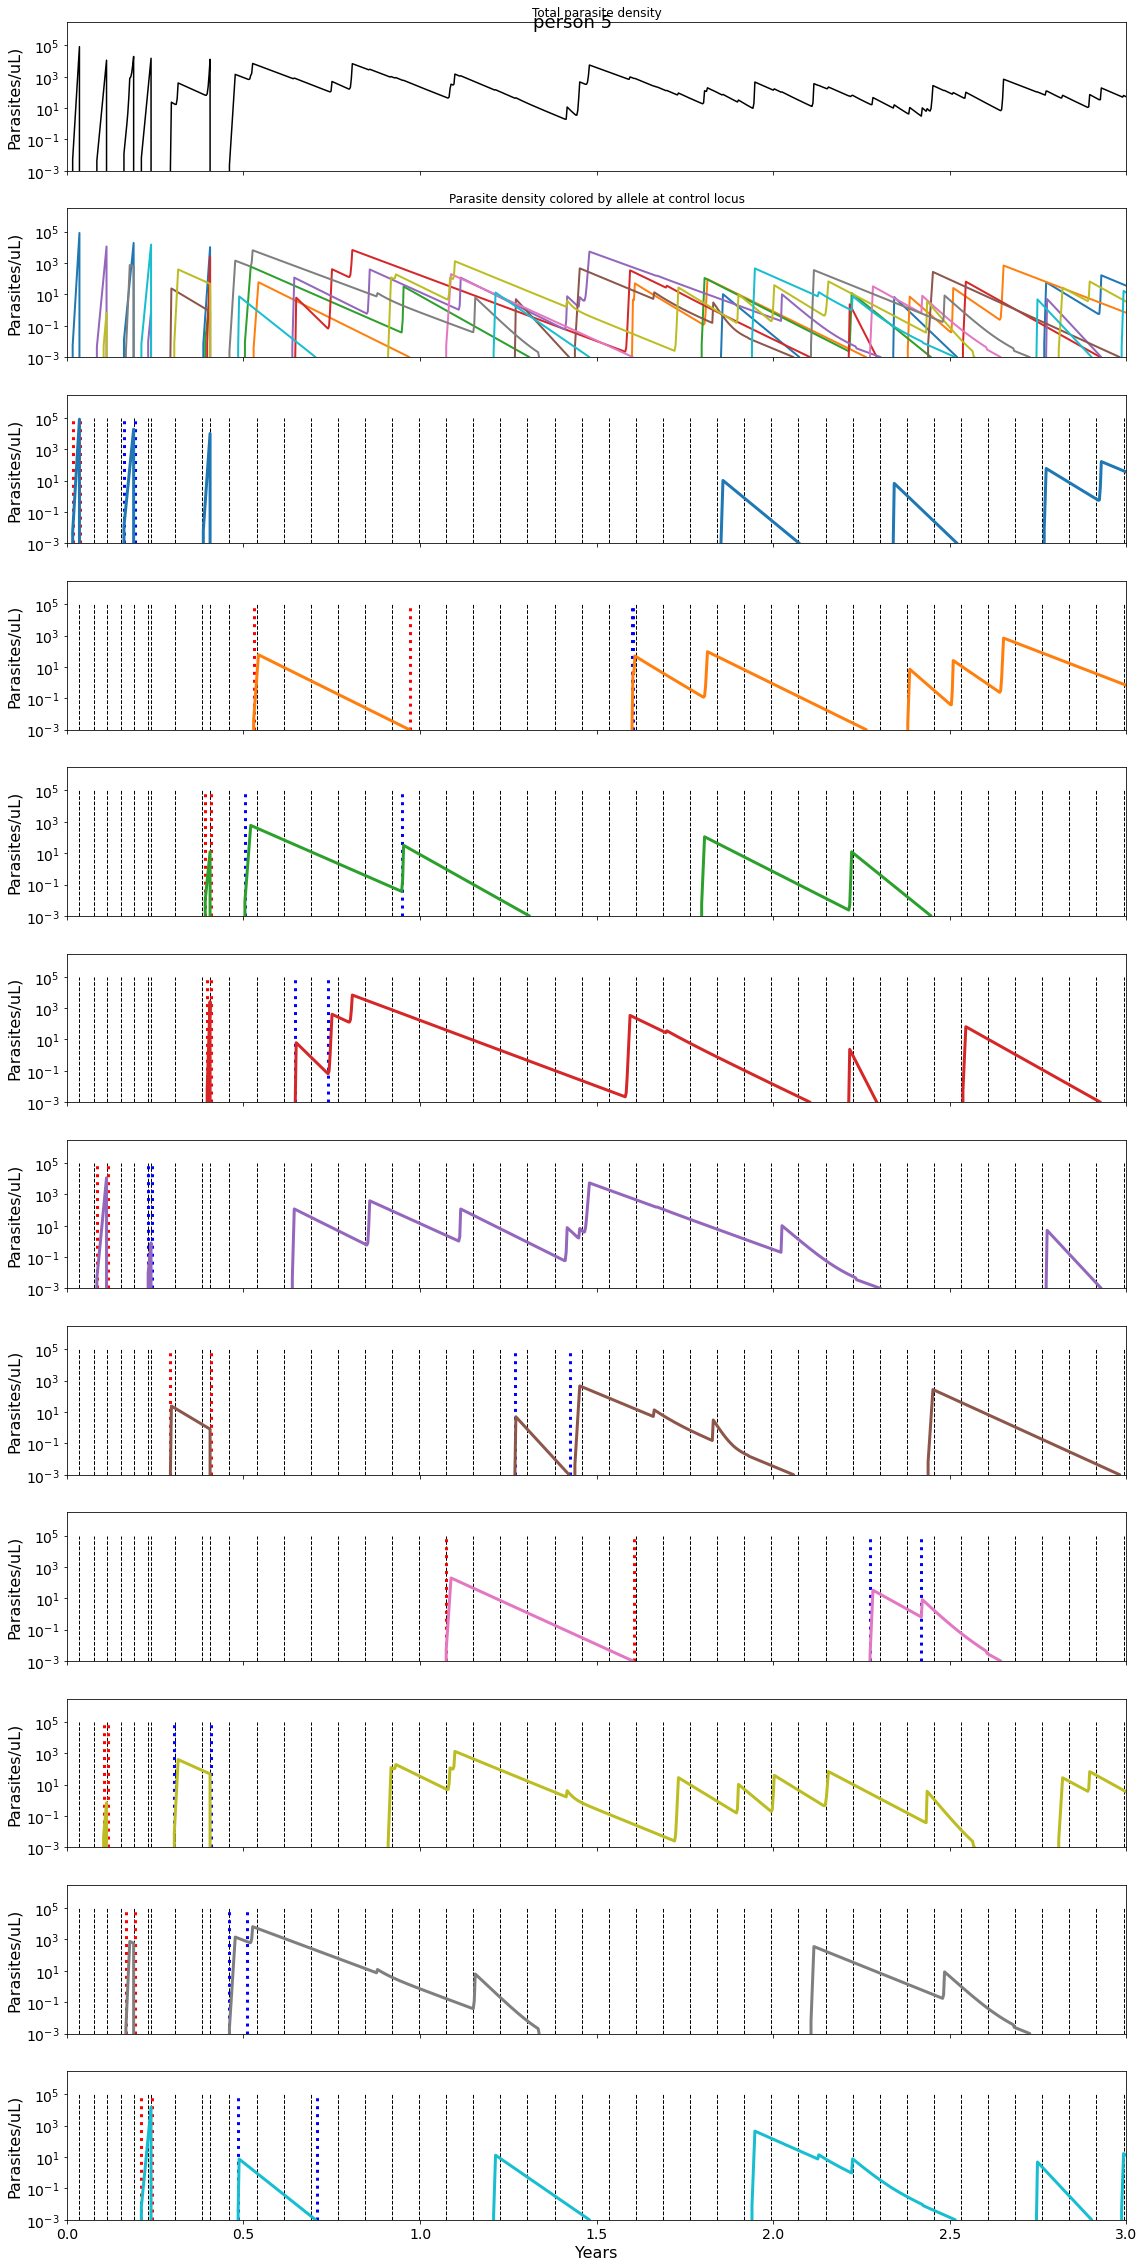

In [15]:
colors = {0:"tab:blue", 1:"tab:orange", 2:"tab:green", 3:"tab:red", 4:"tab:purple", 5:"tab:brown", 6:"tab:pink",7:"tab:olive",8:"tab:grey",9:"tab:cyan"}

for i in range(5,n_people,100):
    fig, ax = plt.subplots(nrows=12, sharey=True, sharex=True, tight_layout=True, figsize=(16,32))
    ax[0].tick_params(axis='both', which='major', labelsize=14)
    ax[1].tick_params(axis='both', which='major', labelsize=14)
    ax[0].set_yscale('log')
    ax[0].plot(np.arange(y*365)/365, all_parasites[i,0,:,:].sum(axis=0),color="black")
    for strain in np.arange(10):
        iStrain = all_parasites[i,0,strain,:]
        if np.sum(iStrain) > 1:
            ax[1].plot(np.arange(y*365)/365, iStrain, linewidth=2,color=colors[strain])
    ax[0].set_ylim(0.001,3000000)
    ax[0].set_xlim(0,3)
    fig.suptitle('person ' + str(i),fontsize=18)
    ax[11].set_xlabel('Years',fontsize=16)
    ax[0].set_ylabel('Parasites/uL)',fontsize=16)
    ax[0].set_title('Total parasite density')
    ax[1].set_title('Parasite density colored by allele at control locus')
    ax[1].set_ylabel('Parasites/uL)',fontsize=16)
    for row in range(2,12):
        ax[row].tick_params(axis='both', which='major', labelsize=14)
        ax[row].set_ylabel('Parasites/uL)',fontsize=16)
        other = [strain for strain in range(0,10) if strain != row-2]
        ax[row].plot(np.arange(y*365)/365, all_parasites[i,0,row-2,:],linewidth=3,color=colors[row-2])
        ax[row].vlines(x=visited[i]/365,ymin=0.001,ymax=100000,color="black",linestyle="dashed",linewidth=1)
        ax[row].vlines(x=all_status[i,0,0,row-2,:]/365,ymin=0.001,ymax=100000,color="red",linewidth=3,linestyle="dotted")
        ax[row].vlines(x=all_status[i,0,1,row-2,:]/365,ymin=0.001,ymax=100000,color="blue",linewidth=3,linestyle="dotted")

In [159]:
all_status[5,0,0,:,:]

array([[ 66.,  71.],
       [244., 243.],
       [  8.,  19.],
       [ 12.,  19.],
       [225., 257.],
       [ 16.,  19.],
       [ 18.,  19.],
       [ 86.,  91.],
       [ 69.,  71.],
       [183., 263.]])

In [160]:
all_status[5,0,1,:,:]

array([[124., 133.],
       [244., 263.],
       [ 53.,  71.],
       [183., 183.],
       [258., 263.],
       [220., 263.],
       [154., 263.],
       [126., 133.],
       [361., 368.],
       [346., 368.]])

The stati are looking good! Occasionally, if bites with the same allele happen back to back, we will have no measurements from either the first or the second infection, but that's okay. Let's move on to plotting distributionsss.

In [50]:
control = {}
test = {}
control['first'] = []
control['second'] = []
test['first'] = []
test['second'] = []

for person in range(n_people):
    for allele in range(max(a)):
        cf_start = all_status[person,0,0,allele,0]
        cf_end = all_status[person,0,0,allele,1]
        cs_start = all_status[person,0,1,allele,0]
        cs_end = all_status[person,0,1,allele,1]
        tf_start = all_status[person,1,0,allele,0]
        tf_end = all_status[person,1,0,allele,1]
        ts_start = all_status[person,1,1,allele,0]
        ts_end = all_status[person,1,1,allele,1]
        
        control['first'].append(np.log10(all_parasites[person,0,allele,cf_start:cf_end].max()))
        control['second'].append(np.log10(all_parasites[person,0,allele,cs_start:cs_end].max()))
        test['first'].append(np.log10(all_parasites[person,-1,allele,tf_start:tf_end].max()))
        test['second'].append(np.log10(all_parasites[person,-1,allele,ts_start:ts_end].max()))
                


In [51]:
diff = np.zeros((len(control['first']),2))


diff[:,0] = np.asarray(control['first'])-np.asarray(control['second'])
diff[:,1] = np.asarray(test['first'])-np.asarray(test['second'])

first = np.zeros((len(control['first']),2))
first[:,0] = np.asarray(control['first'])
first[:,1] = np.asarray(test['first'])

second = np.zeros((len(control['first']),2))
second[:,0] = np.asarray(control['second'])
second[:,1] = np.asarray(test['second'])

tested = np.zeros((len(test['first']),2))
tested[:,0] = np.asarray(test['first'])
tested[:,1] = np.asarray(test['second'])

controlled = np.zeros((len(test['first']),2))
controlled[:,0] = np.asarray(control['first'])
controlled[:,1] = np.asarray(control['second'])

In [54]:
controlm = {}
testm = {}
controlm['first'] = []
controlm['second'] = []
testm['first'] = []
testm['second'] = []

for person in range(n_people):
    for allele in range(max(a)):
        cf_start = all_status[person,0,0,allele,0]
        cf_end = all_status[person,0,0,allele,1]
        cs_start = all_status[person,0,1,allele,0]
        cs_end = all_status[person,0,1,allele,1]
        tf_start = all_status[person,1,0,allele,0]
        tf_end = all_status[person,1,0,allele,1]
        ts_start = all_status[person,1,1,allele,0]
        ts_end = all_status[person,1,1,allele,1]
        
        for t in range(cf_start, cf_end):
            if t in visited[person]:
                controlm['first'].append(np.log10(all_parasites[person,0,allele,t]))
                
        for t in range(cs_start, cs_end):
            if t in visited[person]:
                controlm['second'].append(np.log10(all_parasites[person,0,allele,t]))
        
        for t in range(tf_start, tf_end):
            if t in visited[person]:
                testm['first'].append(np.log10(all_parasites[person,-1,allele,t]))
                
        for t in range(ts_start, ts_end):
            if t in visited[person]:
                testm['second'].append(np.log10(all_parasites[person,-1,allele,t]))
                

                

In [55]:
def set_axis_style(ax, lab):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(ticks = np.arange(1, len(lab) + 1))
    ax.set_xticklabels(lab)
    ax.set_xlim(0.25, len(lab) + 0.75)


4.628972573669503e-29
5.243055159411887e-64


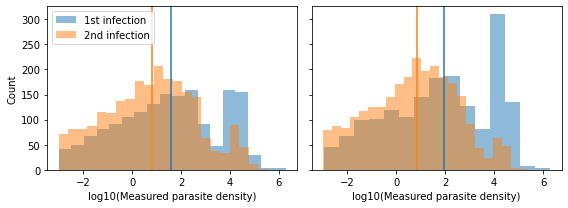

In [97]:
for i,dic in zip([0,1],[controlm, testm]):
    s,pvalue = st.ranksums(x=dic['first'],y=dic['second'])
    print(pvalue)
    #ax[i].text(-2,100,"Wilcoxon rank-sum test\np-value = " + "{:.2e}".format(pvalue))
lab = ["First infection", "Second infection"]
fig,ax = plt.subplots(ncols=2,sharey=True, figsize =(8,3))
ax[0].hist(x=controlm['first'],histtype='stepfilled',alpha=0.5,bins='auto',label=lab)
ax[0].hist(x=controlm['second'],histtype='stepfilled',alpha=0.5,bins='auto',label=lab)
ax[1].hist(x=testm['first'],histtype='stepfilled',alpha=0.5,bins='auto',label=lab)
ax[1].hist(x=testm['second'],histtype='stepfilled',alpha=0.5,bins='auto',label=lab)
#set_axis_style(ax,lab)
ax[0].legend(('1st infection', '2nd infection'), loc='upper left')
ax[0].axvline(np.median(controlm['first']))
ax[0].axvline(np.median(controlm['second']),color="tab:orange")
ax[1].axvline(np.median(testm['first']))
ax[1].axvline(np.median(testm['second']),color="tab:orange")
ax[0].set_ylabel("Count")
#ax[1].set_ylabel("Test locus")
ax[1].set_xlabel('log10(Measured parasite density)')
ax[0].set_xlabel('log10(Measured parasite density)')
fig.tight_layout()

fig.savefig("measured-parasite-density_control_test.pdf")

In [20]:
s,pvalue =st.ranksums(x=diff[:,0],y=diff[:,1])

Text(1.2, 6, 'Wilcoxon rank-sum test\np-value = 5.24e-64')

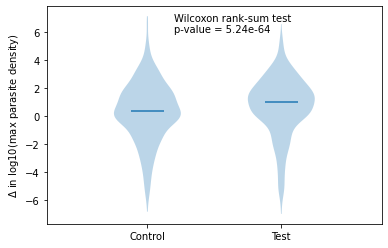

In [58]:
lab = ["Control", "Test"]
fig,ax = plt.subplots()
ax.violinplot(dataset=diff,showextrema=False,showmedians=True)
set_axis_style(ax,lab)
ax.set_ylabel(r'$\Delta$ in log10(max parasite density)')
ax.text(1.2,6,"Wilcoxon rank-sum test\np-value = " + "{:.2e}".format(pvalue))
#fig.savefig("delta-parasite-density_control_test.pdf")

4.925016249147441e-09
2.568734936493628e-41


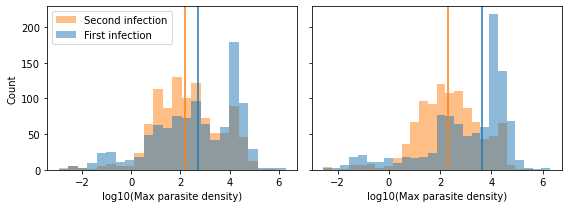

In [98]:
for i,arr in zip([0,1],[controlled, tested]):
    s,pvalue = st.ranksums(x=arr[:,0],y=arr[:,1])
    print(pvalue)
    #ax[i].text(-2,100,"Wilcoxon rank-sum test\np-value = " + "{:.2e}".format(pvalue))
lab = ["First infection", "Second infection"]
fig,ax = plt.subplots(ncols=2,sharey=True, figsize =(8,3))
ax[0].hist(x=controlled,histtype='stepfilled',alpha=0.5,bins='auto',label=lab)
ax[1].hist(x=tested,histtype='stepfilled',alpha=0.5,bins='auto',label=lab)
#set_axis_style(ax,lab)
ax[0].legend(loc='upper left')
ax[0].axvline(np.median(controlled[:,0]))
ax[0].axvline(np.median(controlled[:,1]),color="tab:orange")
ax[1].axvline(np.median(tested[:,0]))
ax[1].axvline(np.median(tested[:,1]),color="tab:orange")
ax[0].set_ylabel("Count")
#ax[1].set_ylabel("Test locus")
ax[1].set_xlabel('log10(Max parasite density)')
ax[0].set_xlabel('log10(Max parasite density)')
fig.tight_layout()
fig.savefig("max-parasite-density_control_test.pdf")


In [99]:
max_control = {}
max_test = {}
max_control['first'] = []
max_control['second'] = []
max_test['first'] = []
max_test['second'] = []

for person in range(n_people):
    for allele in range(max(a)):
        cf = []
        cs = []
        tf = []
        ts = []
        cf_start = all_status[person,0,0,allele,0]
        cf_end = all_status[person,0,0,allele,1]
        cs_start = all_status[person,0,1,allele,0]
        cs_end = all_status[person,0,1,allele,1]
        tf_start = all_status[person,1,0,allele,0]
        tf_end = all_status[person,1,0,allele,1]
        ts_start = all_status[person,1,1,allele,0]
        ts_end = all_status[person,1,1,allele,1]
        
        for t in range(cf_start, cf_end):
            if t in visited[person]:
                cf.append(np.log10(all_parasites[person,0,allele,t]))
                
        for t in range(cs_start, cs_end):
            if t in visited[person]:
                cs.append(np.log10(all_parasites[person,0,allele,t]))
        
        for t in range(tf_start, tf_end):
            if t in visited[person]:
                tf.append(np.log10(all_parasites[person,-1,allele,t]))
                
        for t in range(ts_start, ts_end):
            if t in visited[person]:
                ts.append(np.log10(all_parasites[person,-1,allele,t]))
        print(cf)
        max_control['first'].append(max(cf))
        max_control['second'].append(max(cs))
        max_test['first'].append(max(tf))
        max_test['second'].append(max(ts))

[3.178397745054067, 4.0535381372842245]


ValueError: max() arg is an empty sequence

So, I can't actually grab the maximum measured value from each infection because not all infections have measured values

I'm just not going to worry about it for now. And I'll move on to plotting time since last seen allele and parasite density.

### Is there a relationship between parasite density and time since the allele was last seen?
There is a relationship between max parasite density and strain specific immunity at time of infection. Time since allele was last seen might be a good proxy for strain specific immunity here.

In [79]:
recorded = np.copy(all_parasites)
results = {}
results['control'] = {}
results['control']['time'] = []
results['control']['pdensity'] = []
results['test'] = {}
results['test']['time'] = []
results['test']['pdensity'] = []

for person in range(n_people):
    no_visit = [day for day in range(y*365) if day not in visited[person]]
    recorded[person,:,:,no_visit] = 0
    for allele in range(max(a)):
        for times in np.nonzero(recorded[person,0,allele,:]):
            for i,t in enumerate(times):
                if i == 0:
                    continue
                elif times[i] - times[i-1] >= 28:
                    results['control']['time'].append(times[i] - times[i-1])
                    results['control']['pdensity'].append(np.log10(recorded[person,0,allele,t]))
                    #results['control']['pdensity'].append(recorded[person,0,allele,t])

        for times in np.nonzero(recorded[person,-1,allele,:]):
            for i,t in enumerate(times):
                if i == 0:
                    continue
                elif times[i] - times[i-1] >= 28:
                    results['test']['time'].append(times[i] - times[i-1])
                    results['test']['pdensity'].append(np.log10(recorded[person,-1,allele,t]))  
                    #results['test']['pdensity'].append(recorded[person,-1,allele,t])

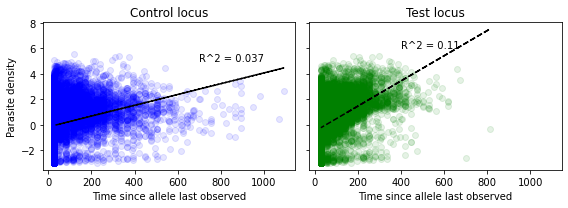

In [101]:
slope_c, intercept_c, r_c, p_c, se_c = st.linregress(results['control']['time'], results['control']['pdensity'])
calc_c = slope_c*np.asarray(results['control']['time']) + intercept_c

slope_t, intercept_t, r_t, p_t, se_t = st.linregress(results['test']['time'], results['test']['pdensity'])
calc_t = slope_t*np.asarray(results['test']['time']) + intercept_t


fig,ax = plt.subplots(ncols=2, sharex=True, sharey=True,figsize = (8,3))
ax[0].plot(results['control']['time'],results['control']['pdensity'], 'bo', alpha=0.1)
ax[0].plot(results['control']['time'], calc_c, '--k')
ax[0].set_xlabel('Time since allele last observed')
ax[0].set_ylabel('Parasite density')
ax[0].set_title('Control locus')
ax[0].text(700,5, "R^2 = " + "{0:.2g}".format(r_c**2))

ax[1].plot(results['test']['time'],results['test']['pdensity'], 'go', alpha=0.1)
ax[1].plot(results['test']['time'], calc_t, '--k')
ax[1].set_xlabel('Time since allele last observed')
ax[1].set_title('Test locus')
ax[1].text(400,6, "R^2 = " + "{0:.2g}".format(r_t**2))
#ax[0].set_yscale('log')
fig.tight_layout()
fig.savefig("time-since_parasite-density.pdf")

In [75]:
slope, intercept, r, p, se = st.linregress(results['test']['time'], results['test']['pdensity'])
r**2

0.021366006807490824

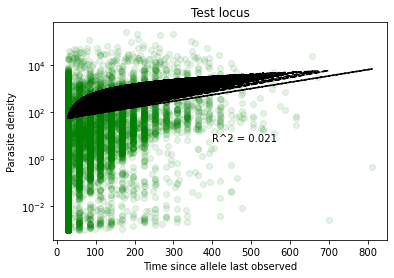

In [76]:
calc = slope*np.asarray(results['test']['time']) + intercept

fig,ax = plt.subplots()
ax.plot(results['test']['time'],results['test']['pdensity'], 'go', alpha=0.1)
ax.plot(results['test']['time'], calc, '--k')
ax.set_xlabel('Time since allele last observed')
ax.set_ylabel('Parasite density')
ax.set_title('Test locus')
ax.text(400,6, "R^2 = " + "{0:.2g}".format(r**2))
ax.set_yscale('log')
fig.savefig("test_time-since_parasite-density.pdf")

In [ ]:
recorded = np.copy(all_parasites)
results = {}
results['control'] = {}
results['control']['time'] = []
results['control']['pdensity'] = []
results['test'] = {}
results['test']['time'] = []
results['test']['pdensity'] = []

for person in range(n_people):
    no_visit = [day for day in range(y*365) if day not in visited[person]]
    recorded[person,:,:,no_visit] = 0
    for allele in range(max(a)):
        for times in np.nonzero(recorded[person,0,allele,:]):
            for i,t in enumerate(times):
                if i == 0:
                    continue
                elif times[i] - times[i-1] >= 28:
                    results['control']['time'].append(times[i] - times[i-1])
                    results['control']['pdensity'].append(np.log10(recorded[person,0,allele,t]))
                    #results['control']['pdensity'].append(recorded[person,0,allele,t])

        for times in np.nonzero(recorded[person,-1,allele,:]):
            for i,t in enumerate(times):
                if i == 0:
                    continue
                elif times[i] - times[i-1] >= 28:
                    results['test']['time'].append(times[i] - times[i-1])
                    results['test']['pdensity'].append(np.log10(recorded[person,-1,allele,t]))  
                    #results['test']['pdensity'].append(recorded[person,-1,allele,t])

In [ ]:
slope_c, intercept_c, r_c, p_c, se_c = st.linregress(results['control']['time'], results['control']['pdensity'])
calc_c = slope_c*np.asarray(results['control']['time']) + intercept_c

slope_t, intercept_t, r_t, p_t, se_t = st.linregress(results['test']['time'], results['test']['pdensity'])
calc_t = slope_t*np.asarray(results['test']['time']) + intercept_t


fig,ax = plt.subplots(nrows=2, sharex=True, sharey=True,figsize = (6,8))
ax[0].plot(results['control']['time'],results['control']['pdensity'], 'bo', alpha=0.1)
ax[0].plot(results['control']['time'], calc_c, '--k')
ax[0].set_xlabel('Time since allele last observed')
ax[0].set_ylabel('Parasite density')
ax[0].set_title('Control locus')
ax[0].text(700,5, "R^2 = " + "{0:.2g}".format(r_c**2))

ax[1].plot(results['test']['time'],results['test']['pdensity'], 'go', alpha=0.1)
ax[1].plot(results['test']['time'], calc_t, '--k')
ax[1].set_xlabel('Time since allele last observed')
ax[1].set_title('Test locus')
ax[1].text(400,6, "R^2 = " + "{0:.2g}".format(r_t**2))
#ax[0].set_yscale('log')
fig.savefig("time-since_parasite-density.pdf")